# PROYECTO GRUPAL CLASIFICACIÓN DE DOMINIOS

GRUPO 2

Integrantes:

- Juan Pablo Heredia Castelló | jpheredia.edu@gmail.com




## 1. IMPORTACIÓN DE LIBRERÍAS


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. IMPORTACIÓN Y PRIMERA INSPECCIÓN DE DATOS

In [23]:
df = pd.read_csv("dga_dataset_safe.csv", sep=",", encoding="utf-8")

df.head()


,lenght,ngram_count,entropy,type
0,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,class
2,25.0,0.9030899869919435,4.053660689688185,dga
3,26.0,0.8450980400142568,3.9500637564362093,dga
4,12.0,2.9030899869919438,3.188721875540867,dga


In [24]:
df.tail()


,lenght,ngram_count,entropy,type
24070,7.0,7.3153824963149905,2.8073549220576046,legit
24071,14.0,39.85682442887054,3.2359263506290334,legit
24072,26.0,0.9030899869919435,4.286790198827112,dga
24073,10.0,12.978671778835801,3.121928094887362,legit
24074,27.0,0.3010299956639812,4.134336113194452,dga


"type" es una variable categorica, vamos a comprobar que categorías existen

In [25]:
df["type"].unique()

array(['discrete', 'class', 'dga', 'legit'], dtype=object)

Hay 2 valores en la columna "type" que son "discrete" y "class" que parecen ser una forma de clasificar el type de datos de dicha columna, se comprueba esto a continuación

In [26]:

# Contar la cantidad de valores "discrete" y "class" en la columna "type"
print("Discrete: ", (df["type"] == "discrete").sum())
print("Class: ", (df["type"] == "class").sum())


Discrete:  1
Class:  1


Como estos solo aparecen 1 vez, se pueden eliminar la columna "type"


In [27]:
# Eliminar las 2 primeras filas del dataset
df = df.iloc[2:].reset_index(drop=True) # Usar reset_index para que los cambios se guarden directamente en el dataframe

# Verificar que las filas se hayan eliminado correctamente
df.head()



,lenght,ngram_count,entropy,type
0,25.0,0.9030899869919435,4.053660689688185,dga
1,26.0,0.8450980400142568,3.9500637564362093,dga
2,12.0,2.9030899869919438,3.188721875540867,dga
3,9.0,15.023867217706147,2.94770277922009,legit
4,10.0,24.764260381085812,2.9219280948873623,legit


Vamos a comprobar los types de datos y si es necesario realizar ciertas transformaciones

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24073 entries, 0 to 24072
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lenght       24073 non-null  object
 1   ngram_count  24073 non-null  object
 2   entropy      24073 non-null  object
 3   type         24073 non-null  object
dtypes: object(4)
memory usage: 752.4+ KB


Las variables de nuestro dataframe deberían corresponder con los siguientes types de datos:

- entropy: Longitud del nombre del dominio (variable numérica continua).
- ngram_count: Conteo de n-gramas presentes en el dominio (variable numérica continua).
- entropy: Medida de la aleatoriedad del dominio (variable numérica continua).
- type: Clasificación del dominio como dga o legítimo (variable categórica).

Se comprueba que no hay valores nulos.

In [29]:
# Convertir las columnas numéricas a los dtypes correctos

df = df.astype({
    'lenght' : 'float64',
    'entropy': 'float64',
    'ngram_count': 'float64', 
    'entropy': 'float64'
})


## 2. EDA (Analisis Exploratorio de Datos)

Una forma de realizar EDA es separar el análisis segun el type de variable, categórica o numérica


### 2.1. Anáisis de variables categóricas

Se realizará un análisis de frecuencia para conocer la cantidad de datos por "type"

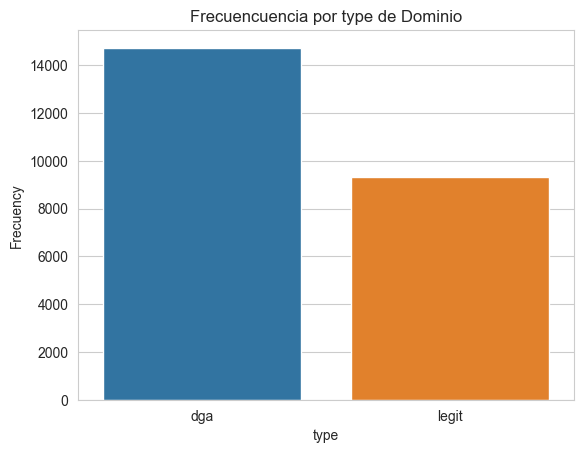

In [30]:
# Crear un gáfico de barras
sns.countplot(df, x='type')

plt.title("Frecuencuencia por type de Dominio")
plt.ylabel("Frecuency")

plt.show()

Lo último que vamos a hacer sobre este análisis, es comprobar la proporción de cada clase, de esta forma podemos clasificar el problema según el desbalanceo entre clases.

In [31]:

# Calcular las proporciones de cada clase
print(((df['type'] == 'dga').sum()) / ((df['type'] == 'legit').sum()))


1.5796185169309902


Dado que la proporción es 1,58:1 podemos clasificar el dataset como balanceado

### 2.2. Análisis de variables Numéricas

En esta sección se analizará la distribución de variables numéricas distinguiendo entre tipos de dominio, con el objetivo de buscar patrones para mejorar el entrenamiento del modelo de Machine Learning

#### 2.2.1. Análisis de Distribución

Se estudia a través de un diagrama de cajas y bigotes la distribución cuantílica de los datos, así como la presencia de outliers por tipo de dominio.

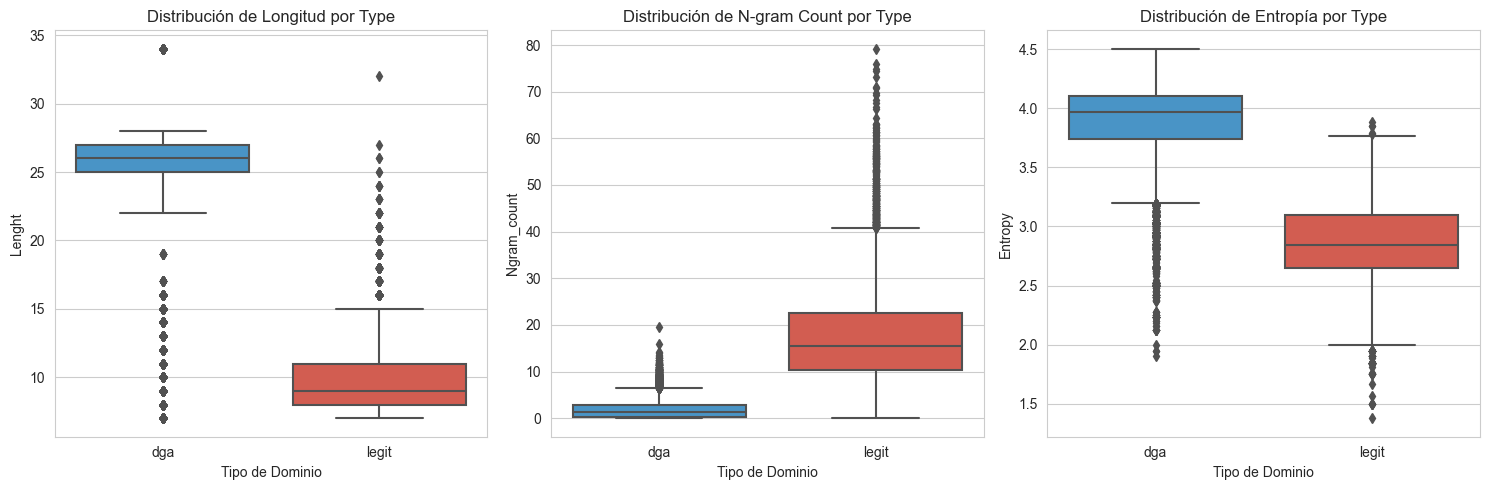

In [32]:
# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Personalizar estilo
sns.set_style("whitegrid")
colors = ['#3498db', '#e74c3c']

# Lista de características y títulos
features = ['lenght', 'ngram_count', 'entropy']
titles = ['Distribución de Longitud por Type', 'Distribución de N-gram Count por Type', 'Distribución de Entropía por Type']

# Generar boxplots usando un bucle
for ax, feature, title in zip(axes, features, titles):
    sns.boxplot(x='type', y=feature, data=df, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_xlabel('Tipo de Dominio')
    ax.set_ylabel(feature.capitalize())  # Usar la primera letra en mayúscula

# Ajustar el layout
plt.tight_layout()
plt.show()


Para entender las asociaciones entre variables numéricas por tipo de dominio se va a emplear un pairplot, que además nos ayuda a conocer la forma de distribución de los datos.

c:\Users\34654\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\34654\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\34654\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\34654\App

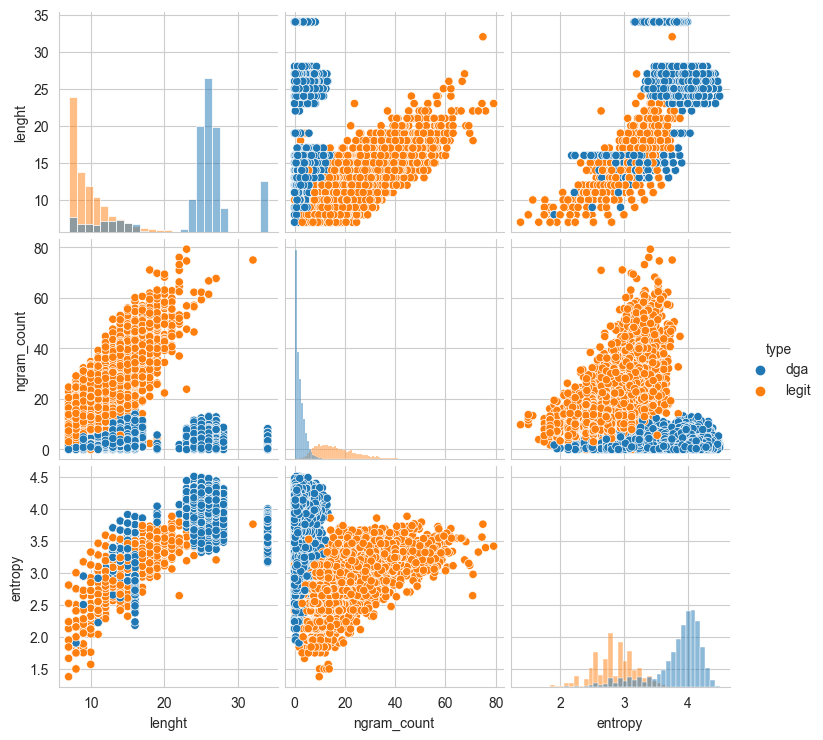

In [33]:
sns.pairplot(df, hue='type', diag_kind='hist')  # diag_kind puede ser 'hist' o 'kde'
plt.show()

Una vez visualizados los histogramas, es interesante evaluar la normalidad de las distribuciones, ya que hay modelos de ML que asumen distribuciones normales.

Para evaluar este tipo de distribución podemos:

- Evaluar visualmente mediante Q-Q Plots
- Visualizar numéricamente ya que las distribuciones poseen una varianza de 1 y donde la media y la mediana son iguales
- Evaluar mediante test de hipótesis la noirmalidad (Shapiro-Wilk, Kolmogorov-Smirnov, prubas de curtosis, entre otras...)

Por simplicidad se evaluará mediante la visualización de Q-Q plots

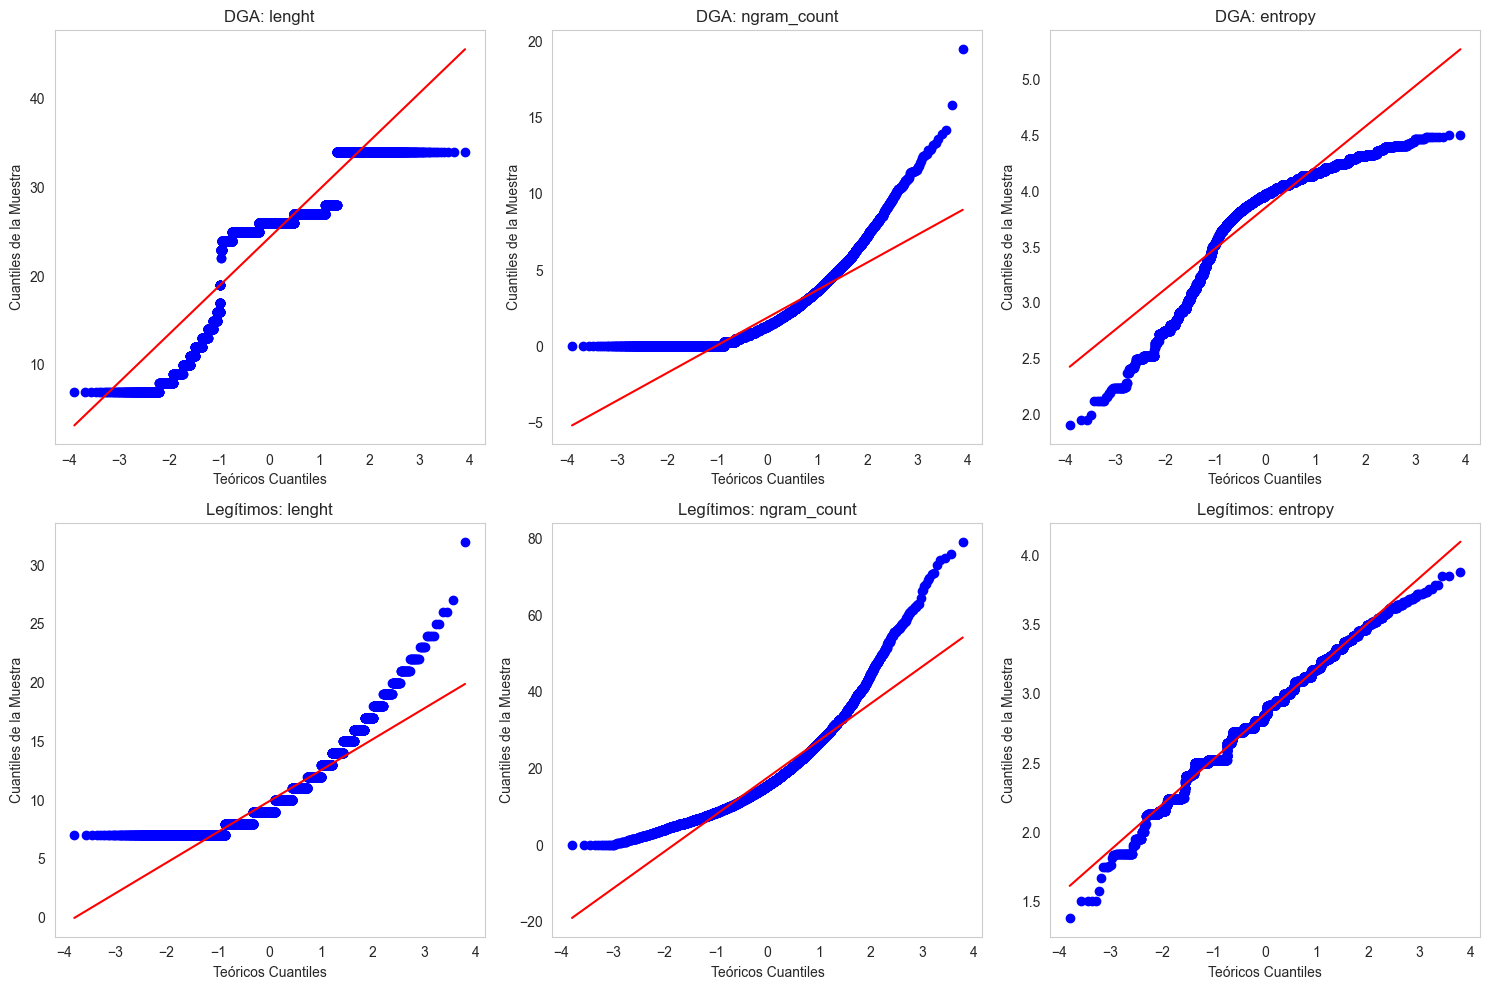

In [34]:
import scipy.stats as stats

# Filtrar los datos por type
dga_data = df[df['type'] == 'dga']
legit_data = df[df['type'] == 'legit']

# Crear subplots con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas y 3 columnas

# Nombres de las características
features = ['lenght', 'ngram_count', 'entropy']

# Crear Q-Q plots para dga y Legítimos
for i, feature in enumerate(features):
    # Q-Q plot para dga
    stats.probplot(dga_data[feature], dist="norm", plot=axes[0, i])  # Fila 0
    axes[0, i].set_title(f'DGA: {feature}')
    axes[0, i].set_xlabel('Teóricos Cuantiles')
    axes[0, i].set_ylabel('Cuantiles de la Muestra')
    axes[0, i].grid()

    # Q-Q plot para Legítimos
    stats.probplot(legit_data[feature], dist="norm", plot=axes[1, i])  # Fila 1
    axes[1, i].set_title(f'Legítimos: {feature}')
    axes[1, i].set_xlabel('Teóricos Cuantiles')
    axes[1, i].set_ylabel('Cuantiles de la Muestra')
    axes[1, i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()



Por último, obtenemos los valores numéricos agrupados por tipos de dominio

In [35]:
# Mostrar estadísticas agrupadas por type
print(df.groupby('type').describe().T)

type                        dga        legit
lenght      count  14741.000000  9332.000000
            mean      24.372566     9.939563
            std        6.141567     2.821369
            min        7.000000     7.000000
            25%       25.000000     8.000000
            50%       26.000000     9.000000
            75%       27.000000    11.000000
            max       34.000000    32.000000
ngram_count count  14741.000000  9332.000000
            mean       1.887875    17.586773
            std        1.973438    10.103633
            min        0.000000     0.000000
            25%        0.301030    10.310832
            50%        1.342423    15.490272
            75%        2.766413    22.497009
            max       19.492867    79.171842
entropy     count  14741.000000  9332.000000
            mean       3.849046     2.856246
            std        0.395179     0.329807
            min        1.905639     1.378783
            25%        3.741156     2.646439
          

**Test de Homogeneidad**

Para evaluar la homogeneidad de varianzas entre grupos no se asumirá distribución normal por lo que se empleará el test de Levene.

El estudio de homogeneidad nos permitirá discriminar en el uso de algoritmos de ML que asumen homogeneidad.

In [36]:
from scipy.stats import levene

# Supongamos que ya tienes tus datos DGA y legítimos en DataFrames llamados dga_data y legit_data

# Prueba de Levene para cada característica
stat_lenght, p_value_lenght = levene(dga_data['lenght'], legit_data['lenght'])
stat_ngram, p_value_ngram = levene(dga_data['ngram_count'], legit_data['ngram_count'])
stat_entropy, p_value_entropy = levene(dga_data['entropy'], legit_data['entropy'])

# Nivel de significancia
alpha = 0.05

# Función para evaluar los resultados de la prueba de Levene
def evaluate_levene_test(statistic, p_value):
    if p_value < alpha:
        return "Rechazamos la hipótesis nula: hay evidencia de que las varianzas son diferentes, no existe homogeneidad entre grupos para esta variable."
    else:
        return "No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que las varianzas son diferentes, existe homogeneidad entre grupos para esta variable."

# Resultados y evaluación
results = {
    'lenght': (stat_lenght, p_value_lenght),
    'ngram_count': (stat_ngram, p_value_ngram),
    'entropy': (stat_entropy, p_value_entropy)
}

for variable, (statistic, p_value) in results.items():
    conclusion = evaluate_levene_test(statistic, p_value)
    print(f'Prueba de Levene para {variable}: estadístico={statistic}, p-value={p_value}')
    print(f'  Conclusión: {conclusion}\n')

Prueba de Levene para lenght: estadístico=728.6309001359831, p-value=4.015952936526344e-158
  Conclusión: Rechazamos la hipótesis nula: hay evidencia de que las varianzas son diferentes, no existe homogeneidad entre grupos para esta variable.

Prueba de Levene para ngram_count: estadístico=10062.849335543671, p-value=0.0
  Conclusión: Rechazamos la hipótesis nula: hay evidencia de que las varianzas son diferentes, no existe homogeneidad entre grupos para esta variable.

Prueba de Levene para entropy: estadístico=2.9507595223988496, p-value=0.0858500692039914
  Conclusión: No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que las varianzas son diferentes, existe homogeneidad entre grupos para esta variable.



### 2.2.2. Estudio de Correlación

Se estudia las distribuciones para evaluar las posibles correlaciones entre las variables. Para poder incluir la variable 'type' en el estudio, primero se realizará un encoding para clasificar  "legit" = 1 y "dga" = 0.



Se evaluar la multicolinealidad entre variables usando test de hipótesis, debido a que la multicolinealidad puede dificultar la eficiencia del modelo. 

Este estudio se centra en correlaciones de tipo lineal.



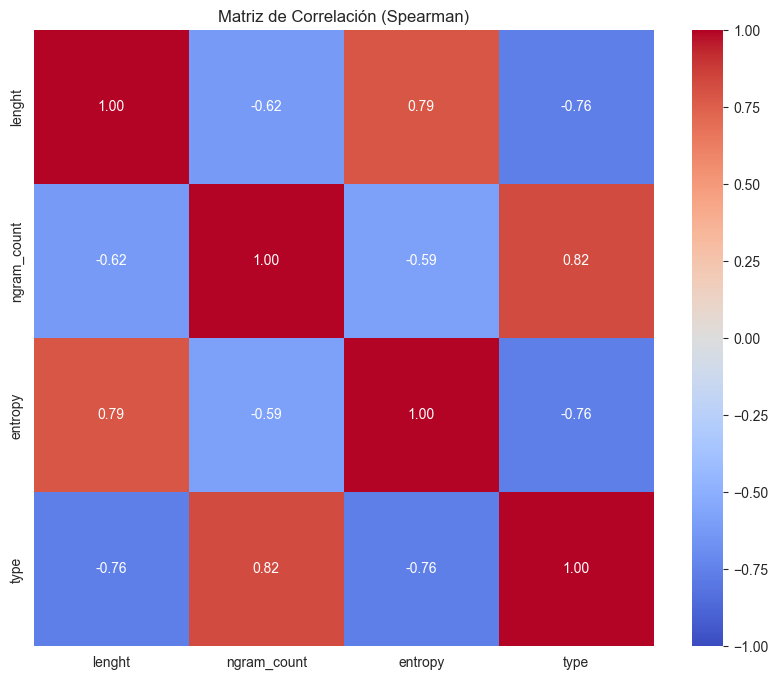

In [37]:
# 1. Crear una copia del dataframe y convertir 'type' a numérico
df_corr = df.copy()
df_corr['type'] = df_corr['type'].map({'legit': 1, 'dga': 0})

correlation_matrix = df_corr.corr(method='spearman') # Debido a la que se presentan distribuciones no normales el método empleado será Spearman

# 3. Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='coolwarm', 
            vmin=-1, vmax=1,  
            center=0,  
            fmt='.2f')  
plt.title('Matriz de Correlación (Spearman)')
plt.show()

In [38]:
# Importar librería
import statsmodels.api as sm

# Crear un DataFrame vacío para almacenar los VIF
vif_data = pd.DataFrame()
vif_data["feature"] = features

# Calcular el VIF para cada variable
vif_data["VIF"] = [1 / (1 - sm.OLS(df[feature], sm.add_constant(df[features].drop(feature, axis=1))).fit().rsquared) for feature in features]

vif_data


,feature,VIF
0,lenght,4.716809
1,ngram_count,1.399477
2,entropy,4.502466


### 2.3. Estudio de Clasificación Preliminar

Dado que se ha observado una correlación lineal entre grupos y el análisis estadístico revela patrones en ambos grupos, se empleará el **IQR** (Rango Intercuartílico) para realizar una clasificación preliminar y determinar si existe una diferenciación entre los grupos basándonos en este criterio.

La elección del **IQR** se basa en que es una estadística descriptiva robusta, ya que no se ve influenciada por *outliers*. Para cada variable, se calcularán el cuartil 25 y el cuartil 75:

$$
Q1 = \text{percentil 25} \quad \text{y} \quad Q3 = \text{percentil 75}
$$



Con estos valores, se calcula el rango intercuartílico como:

$$
\text{IQR} = Q3 - Q1
$$

In [39]:
# Filtrado de datos para cada tipo de dominio
legit_data = df[df['type'] == 'legit']
dga_data = df[df['type'] == 'dga']

# Definición de características y límites
features_iqr = ['entropy', 'ngram_count', 'lenght']  

In [40]:
iqr_results = {}

# Calcular el IQR para cada característica y cada tipo de dominio
for var in features_iqr:
    iqr_dga = dga_data[var].quantile(0.75) - dga_data[var].quantile(0.25)
    iqr_legit = legit_data[var].quantile(0.75) - legit_data[var].quantile(0.25)
    iqr_results[var] = {'DGA': iqr_dga, 'Legítimo': iqr_legit}

iqr_results

{'entropy': {'DGA': 0.3627540546442982, 'Legítimo': 0.4493559103299192},
 'ngram_count': {'DGA': 2.4653828514484184, 'Legítimo': 12.186176026199407},
 'lenght': {'DGA': 2.0, 'Legítimo': 3.0}}

Se puede observar diferencia entre grupos, por lo que se va a emplear el cálculo de límites intercuantílicos para delititar los límites superior e inferior de la clasificación.

Los límites inferior y superior para la predicción se definen mediante las siguientes fórmulas:

$$
\text{Límite Inferior} = Q1 - 1.5 \times \text{IQR}
$$
$$
\text{Límite Superior} = Q3 + 1.5 \times \text{IQR}
$$

Estos límites se aplicarán para realizar una clasificación de dominios, en la que un dominio será clasificado como perteneciente a un grupo (DGA o legítimo) si los valores de todas sus características están dentro de los límites de **IQR** establecidos para cada variable.

Tras realizar la predicción, se utilizará una **matriz de confusión** para evaluar la efectividad de este método. La matriz de confusión permite calcular métricas clave como la **precisión** (accuracy) y el **F1 score** para observar la capacidad del modelo de IQR para distinguir entre los dos tipos de dominios.


La matriz de confusión se organiza de la siguiente manera:

|               | Predicción Positiva (DGA) | Predicción Negativa (Legítimo) |
|---------------|--------------------------|--------------------------------|
| Verdadero Positivo (TP) | TP                       | FN                             |
| Falso Positivo (FP)     | FP                       | TN                             |

A partir de esta tabla, se pueden calcular las siguientes métricas:

- **Precisión (Precision)**: Proporción de predicciones correctas en el total de predicciones realizadas.
  
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **F1 Score**: es una medida que combina la **precission** (Calcula qué porcentaje de los elementos que fueron clasificados como positivos son realmente positivos) y el **recall** (proporción de verdaderos positivos correctamente identificados entre todos los elementos que son realmente positivos)
  
  $$
  \text{F1} = 2 \cdot \frac{Precission \cdot Recall}{Precission + Recall}
  $$

Estas métricas ofrecen una visión detallada de la precisión del modelo y ayudan a identificar posibles errores de clasificación.



In [41]:
def iqr_predict(features, df_type):
    # Diccionario para guardar los límites para cada variable
    iqr_limits = {}

    for var in features_iqr:
        q1 = df_type[var].quantile(0.25)
        q3 = df_type[var].quantile(0.75)
        iqr_dga = q3 - q1
        lower_bound = q1 - 1.5 * iqr_dga
        if lower_bound < 0:  # Evitar límites negativos
            lower_bound = q1
        upper_bound = q3 + 1.5 * iqr_dga
        iqr_limits[var] = (lower_bound, upper_bound)

    # Copiar el DataFrame y aplicar la condición de IQR en múltiples características
    df_iqr_condition = df.copy()
    df_iqr_condition["iqr_pred"] = df.apply(
        lambda row: 'dga' if all(
            iqr_limits[var][0] <= row[var] <= iqr_limits[var][1] for var in features_iqr
        ) else 'legit',
        axis=1
    )

    # Crear la matriz de confusión con pd.crosstab
    contingency_table = pd.crosstab(df_iqr_condition['type'], df_iqr_condition['iqr_pred'], 
                                    rownames=['Actual'], colnames=['Predicted'], margins=True)

    # Extraer los valores de la matriz de confusión
    TP = contingency_table.loc['dga', 'dga']
    FN = contingency_table.loc['dga', 'legit']
    FP = contingency_table.loc['legit', 'dga']
    TN = contingency_table.loc['legit', 'legit']

    # Calcular precission, recall y accuracy
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Manejo de división por cero
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Manejo de división por cero
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Calcular F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print("Matriz de Confusión:\n", contingency_table)
    print(f"Precisión: {precision:.2f}")
    print(f"Sensibilidad (Recall): {recall:.2f}")
    print(f"Puntuación F1: {f1_score:.2f}")
    print(f"Puntuación Accuracy: {accuracy:.2f}")



Se evalua el uso de iqrs usando el dataset filtrado de cada tipo para predecir el resto

In [42]:
iqr_predict (features_iqr,dga_data)

Matriz de Confusión:
 Predicted   dga  legit    All
Actual                       
dga        8670   6071  14741
legit         0   9332   9332
All        8670  15403  24073
Precisión: 1.00
Sensibilidad (Recall): 0.59
Puntuación F1: 0.74
Puntuación Accuracy: 0.75


In [43]:
iqr_predict (features_iqr,legit_data)

Matriz de Confusión:
 Predicted   dga  legit    All
Actual                       
dga          25  14716  14741
legit      6420   2912   9332
All        6445  17628  24073
Precisión: 0.00
Sensibilidad (Recall): 0.00
Puntuación F1: 0.00
Puntuación Accuracy: 0.12


Podemos visualizar los errores de clasificación cuando se usa el dataset filtrado por dominio dga de la siguiente forma:

In [44]:
def iqr_visual_predict(features):
    iqr_limits = {}

    # Crear una copia del DataFrame y aplicar el cálculo del límite IQR
    df_iqr_condition = df.copy()

    # Calcular los límites de IQR para cada característica en el conjunto DGA
    for var in features:
        q1 = dga_data[var].quantile(0.25)
        q3 = dga_data[var].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        if lower_bound < 0:
            lower_bound = q1
        upper_bound = q3 + 1.5 * iqr
        iqr_limits[var] = (lower_bound, upper_bound)

    # Aplicar la predicción en base al IQR calculado
    df_iqr_condition["iqr_pred"] = df.apply(
        lambda row: 'dga' if all(
            iqr_limits[var][0] <= row[var] <= iqr_limits[var][1] for var in features
        ) else 'legit',
        axis=1
    )

    # Configurar los gráficos
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot para 'lenght'
    sns.boxplot(x='type', y='lenght', data=df_iqr_condition, palette='pastel', ax=axs[0])

    # Superponer los puntos de malas clasificaciones para 'lenght'
    incorrect_classifications = df_iqr_condition[df_iqr_condition['iqr_pred'] == 'legit']
    axs[0].scatter(x=incorrect_classifications['type'], y=incorrect_classifications['lenght'], 
                   color='red', label='Malas Clasificaciones', alpha=0.6, edgecolor='black')

    # Añadir líneas para lower_bound y upper_bound en 'lenght'
    axs[0].axhline(iqr_limits['lenght'][0], color='blue', linestyle='--', label='Lower Bound IQR dga')
    axs[0].axhline(iqr_limits['lenght'][1], color='green', linestyle='--', label='Upper Bound IQR dga')

    axs[0].set_title('Boxplot de "lenght" con malas clasificaciones')
    axs[0].set_ylabel('Longitud')
    axs[0].set_xlabel('Tipo de Dominio')
    axs[0].legend()

    # Boxplot para 'ngram_count'
    sns.boxplot(x='type', y='ngram_count', data=df_iqr_condition, palette='pastel', ax=axs[1])

    # Superponer los puntos de malas clasificaciones para 'ngram_count'
    incorrect_classifications = df_iqr_condition[df_iqr_condition['iqr_pred'] == 'legit']
    axs[1].scatter(x=incorrect_classifications['type'], y=incorrect_classifications['ngram_count'], 
                   color='red', label='Malas Clasificaciones', alpha=0.6, edgecolor='black')

    # Añadir líneas para lower_bound y upper_bound en 'ngram_count'
    axs[1].axhline(iqr_limits['ngram_count'][0], color='blue', linestyle='--', label='Lower Bound IQR dga')
    axs[1].axhline(iqr_limits['ngram_count'][1], color='green', linestyle='--', label='Upper Bound IQR dga')

    axs[1].set_title('Boxplot de "ngram_count" con malas clasificaciones')
    axs[1].set_ylabel('Conteo de N-gramas')
    axs[1].set_xlabel('Tipo de Dominio')
    axs[1].legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

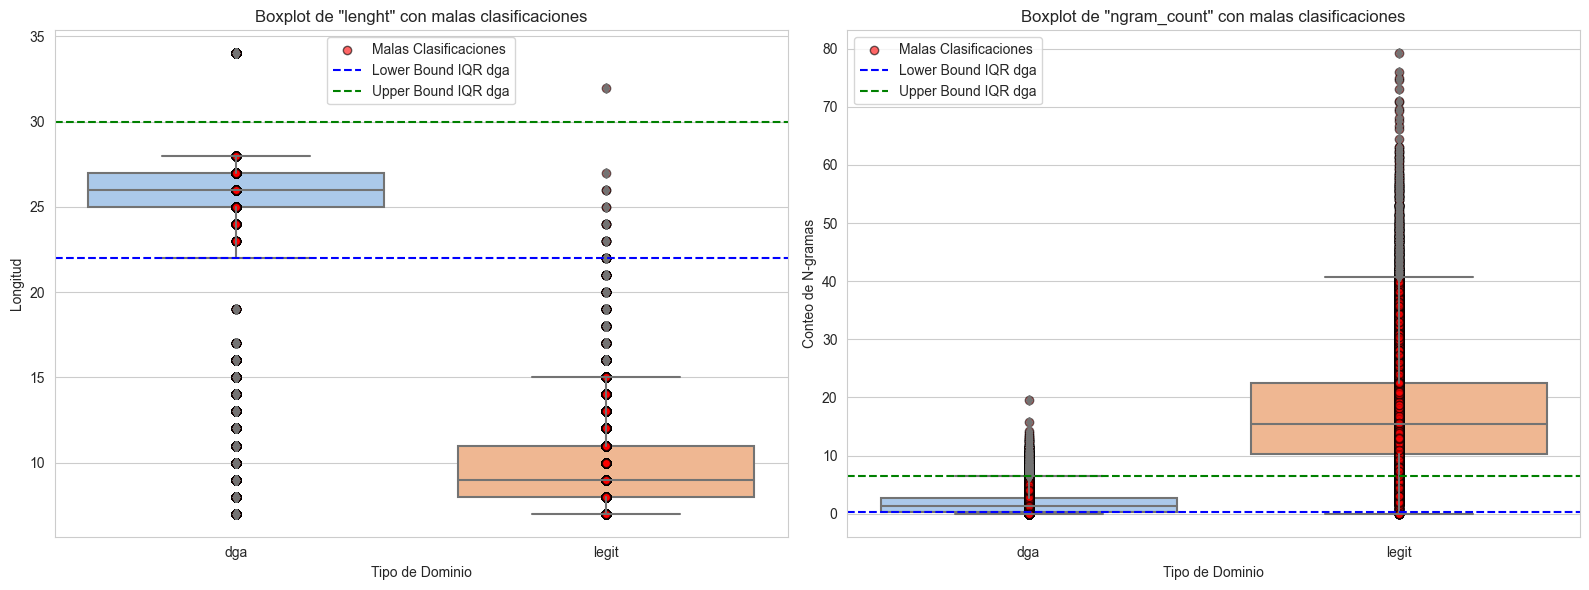

In [45]:
iqr_visual_predict (features_iqr)

**Conclusiones del Estudio**

- **Eficacia en la Clasificación de DGA**: Alta precisión (1.00) al clasificar dominios DGA, indicando que las características seleccionadas son efectivas para esta tarea. Aunque puede indicar overfitting.
  
- **Desempeño Deficiente en Legítimos**: Precisión y recall de 0.00 en dominios legítimos, lo que sugiere un sesgo hacia la clasificación de DGA.

- **Bajo Recall Global**: Un recall de 0.59 para dominios DGA indica que muchos de estos dominios son mal clasificados como legítimos, representando un riesgo en aplicaciones de seguridad.

- **Desbalance de Clases**: La diferencia en rendimiento entre dominios DGA y legítimos resalta la necesidad de abordar el desbalance de clases en el conjunto de datos.

Finalmente, aunque los resultados iniciales sugieren que, aunque el IQR es útil, se requieren técnicas más avanzadas para mejorar la detección en ambas categorías y equilibrar precisión y recall.

### 2.4. Conclusiones EDA

Basandose en el objetivo del proyecto: Predicción de Dominios, con atención a la clasificación de dominios DGA, tras el EDA se recogen las siguiente conclusiones:

1- Distribución de los datos:

- **Longitud**: Los dominios DGA son generalmente más largos (media de 24.37) que los legítimos (media de 9.94). Los valores varían entre 7 y 34.

- **Conteo de n-gramas**: Los dominios legítimos tienen un conteo de n-gramas mucho mayor (media de 17.59) que los DGA (media de 1.89). Existe una gran dispersión en ambos tipos de dominios.

- **Entropía**: Los valores de entropía son más bajos en los dominios legítimos (media de 2.86) que en los DGA (media de 3.85), lo que sugiere que los dominios maliciosos son más impredecibles.

Las distribuciones de las variables no siguen una distribución normal, lo que podría afectar el rendimiento de algunos modelos, especialmente aquellos que asumen normalidad en los datos.

Las distribucuciones muestran valores atípicos (outliers) que pueden afectar negativamente a la clasificación del modelo.

2- Estudio de Correlación con la variable objetivo: 

Las tres variables presentan correlaciones de tipo lineal con la variable target, lo que sugiere que son buenas candidatas para la clasificación. La variable 'ngram_count' tiene una correlación positiva significativa, mientras que 'lenght' y 'entropy' presentan correlaciones negativas significativas, esto indica que 'lenght' y 'entropy' son más indicativas para la clasificación de dominios DGA cuando estos valores son bajos, la correlación negativa entre 'ngram_count' y 'entropy' indica que puede existir una tendencia a que cuando una variable es baja, la otra también lo es, por lo que 'ngram_count' y 'entropy' bajas pueden enfocarse a una predicción más eficaz de dominios DGA mientras que un valor de 'lenght' elevado es más característico de un dominio legit.

3- Estudio de factores que pueden comprometer al modelo

- **Multicolinealidad**: No se han encontrado problemas de multicolinealidad en las variables, lo que es positivo para el desempeño de modelos como Regresión Logística y SVM.

- **Homogeneidad**: La variable 'entropy' presenta homogeneidad en su varianza respecto a las otras variables, esto indica que pude introducir ruido en la predicción al no aportar suficiente valor distintivo.


4- Viabilidad del entrenamiento de modelos de Machine Learning

El EDA da muestra potencialidad para desarrollar modelos de machine learning enfocados en la predicción de la variable target. Se ha estudiado la significancia estadistica para validar la posible diferenciación entre gupos por medios descriptivos, visuales y tests como el uso del IQR para la predicción de clases.

Puntos importantes:

- Evaluar transformaciones de datos en variables 'lenght' y 'ngram_count' debido a asimetrias de distribución
- Evaluar escalado de datos después de aplicar las transformaciones
- Evaluar la eficacia de la variable 'entropy' por presencia de baja variación distintiva
- Asumir correlación lineal con variable target
- Asumir no existencia de multicolinealidad
- Asumir no existencia de distribuciones normales
- Asumir presencia de outliers

## 3. Machine Learning

1. **Objetivo del modelo**

2. **Importar Librerías de Modelos**  
   Modelos a Evaluar:
   - k-Nearest Neighbors (kNN)  
   - Regresión Logística  
   - Support Vector Machines (SVM)  
   - Red Neuronal  
   - Árbol de Decisión (Decision Tree)  
   - Naive Bayes  

3. **Pipeline de Preprocesamiento**
   - **Evaluar Escalado y Otras Transformaciones**  
   - **One-Hot-Encoding** para la variable target: 'type'  
   - **Train-Test Split** con folds estratificados para asegurar una distribución balanceada entre clases  

4. **Inicializar Modelos Base y Calcular Métricas**  

5. **Comparación de Resultados en Modelos Base y Feature Importance**  

6. **Configuración de Hiperparámetros de los Modelos Base Seleccionados**  
   5.1 **Iteración y Comparación de Resultados**  

7. **Modelo Final y Conclusiones**  


### 3.1. Objetivo del modelo

El objetivo del modelo es ser entrenado para ser capaz de predecir la clase de la variable traget, es decir, el tipo de dominio. 

El modelo estará enfocado en la predicción de la clase DGA, que son los dominios mallignos, de esta forma el modelo se centrará en la máxima seguridad.

Para evaluar la efectividad del modelo se seleccionan las siguientes métricas.

- Accuracy: Mide la proporción de predicciones correctas entre todas las predicciones realizadas.
- F1 Score: Combina precisión y recall en una media armónica, útil cuando hay un desbalance entre las clases.
- Precision: Mide la proporción de verdaderos positivos entre todas las predicciones positivas hechas por el modelo.
- Recall: Mide la proporción de verdaderos positivos entre todos los casos reales positivos (en tu caso, los dominios DGA).
- AUC: Mide la capacidad del modelo para distinguir entre las clases, calculando el área bajo la curva ROC.

Las métricas clave para evaluar el modelo es principalmente Recall ya que el objetivo es minimizar los falsos negativos, es decir, asegurarte de que no se pierda ningún dominio DGA. La métrica AUC también es clave ya que indica si el modelo es capaz de distinguir entre clases. Estas 2 serán el foco del ajuste de hyperparámetros.

Accuracy no es la métrica más correcta para problemas de clasificación donde pueda existir un desbalance de clases, que aunque en este momento no es notorio, si que lo podría ser más adelante.

F1 score y Precision pueden ser entendidas como métricas complementarias a nuestro objetivo.

### 3.2. Importar librerías de modelos

In [100]:
# Importar librerías

from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import joblib

Antes de pasar a la siguiente sección,es interesante evaluar como pueden afectar las conclusiones de EDA en el entrenamiento del modelo

1. **k-Nearest Neighbors (kNN)**:
   - Sensible a la escala de los datos.
   - Requiere escalado para trabajar correctamente.
   - Outliers pueden afectar el rendimiento.
   

2. **Regresión Logística**:
   - Sensible a la escala de los datos.
   - Transformaciones pueden ser útiles, especialmente si hay outliers.


3. **Support Vector Machines (SVM)**:
   - Muy sensible a la escala y a los outliers.
   - Escalado imprescindible para buenos resultados.
   

4. **Red Neuronal (MLP)**:
   - Sensible a los outliers y escala.
   - Requiere escalado para evitar que los outliers afecten el entrenamiento.
   

5. **Árbol de Decisión (Decision Tree)**:
   - Menos sensible a los outliers.
   - No necesita escalado, pero puede sobreajustar con muchos outliers.


6. **Naive Bayes**:
   - Menos sensible a los outliers.
   - Puede beneficiarse de transformaciones si las distribuciones son asimétricas.

**Conclusiones Clave**:
- **Escalado necesario**: kNN, Regresión Logística, SVM, y Red Neuronal.
- **Outliers** afectan más a kNN, SVM, y Regresión Logística.
- **Transformaciones** pueden mejorar el rendimiento en casos de distribución sesgada o con outliers.



### 3.3. Pipeline de Preprocesamiento

In [101]:
# Definir las variables de entrada y la variable objetivo
features = ['lenght', 'ngram_count', 'entropy']
target = 'type'

# Preparar las transformaciones (logaritmica, escalado y one hot encoding para 'type')
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log(1+x) para evitar problemas con 0
scaler = StandardScaler()

# Preprocesador con la transformación logarítmica y escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', log_transformer, ['lenght', 'ngram_count']),
        ('scaler', scaler, ['lenght', 'ngram_count', 'entropy'])
    ])

# Crear el pipeline con el preprocesador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)  # marcador de posición para el modelo
])

# División estratificada entre entrenamiento y prueba
X = df[features]  
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

# Mapeo de etiquetas 'legit' -> 1, 'dga' -> 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


### 3.4. Inicializar modelos y calculo de métricas

In [102]:
# Inicializar los modelos
models = {
    'kNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),  # Habilitamos la probabilidad para el cálculo de AUC
    'Neural Network (MLP)': MLPClassifier(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Crear los scorers personalizados para cada métrica
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, pos_label=0),  # Enfocar en la clase 0 (DGA)
    'precision': make_scorer(precision_score, pos_label=0),  # Enfocar en la clase 0 (DGA)
    'recall': make_scorer(recall_score, pos_label=0),  # Enfocar en la clase 0 (DGA)
    'auc': make_scorer(roc_auc_score, needs_proba=True)  # AUC generalmente no necesita especificar una clase
}

c:\Users\34654\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


### 3.5. Evaluación de modelo base vs modelo preprocesado

#### 3.5.1. Modelo Base

Modelo base se define al modelo sin realizar transformaciones ni escalados previos

In [103]:
results = {}

# Evaluar los modelos con Cross Validation para los 3 escenarios a evaluar
for model_name, model in models.items():
    # Evaluar con cross_val_score para cada métrica
    scores = {metric: cross_val_score(model, X_train, y_train_encoded, cv=5, scoring=scorer).mean() 
              for metric, scorer in scorers.items()}
    
    # Guardar los resultados en el diccionario
    results[model_name] = scores

# Convertir el diccionario de resultados en un DataFrame
results_df_no_preprocess = pd.DataFrame(results).T

results_df_no_preprocess

,accuracy,f1,precision,recall,auc
kNN,0.987894,0.990127,0.988981,0.991278,0.994405
Logistic Regression,0.989437,0.991370,0.991949,0.990794,0.999226
SVM,0.989318,0.991286,0.990426,0.992151,0.998308
Neural Network (MLP),0.989259,0.991000,0.990520,0.991860,0.999233
Decision Tree,0.982434,0.985808,0.985290,0.986045,0.981965
Naive Bayes,0.936680,0.945498,0.999458,0.897082,0.998247


#### 3.5.2. Evaluación del modelo con preprocesamiento

Se evalua el modelo utilizando el pipeline previamente definido


In [104]:
for model_name, model in models.items():
    # Crear un pipeline con el preprocesador y el modelo
    pipeline.set_params(classifier=model)

    # Evaluar con cross_val_score para cada métrica
    scores = {metric: cross_val_score(pipeline, X_train, y_train_encoded, cv=5, scoring=scorer).mean() 
              for metric, scorer in scorers.items()}
    
    # Guardar los resultados en el diccionario
    results[model_name] = scores

    # Guardar los modelos preprocesados
    joblib.dump(pipeline, f'{model_name}_pipeline.pkl')


# Convertir el diccionario de resultados en un DataFrame
results_df_preprocess = pd.DataFrame(results).T

results_df_preprocess

,accuracy,f1,precision,recall,auc
kNN,0.987479,0.989776,0.989826,0.989728,0.994557
Logistic Regression,0.989259,0.991220,0.992329,0.990115,0.999205
SVM,0.989378,0.991326,0.991376,0.991278,0.998731
Neural Network (MLP),0.989496,0.991377,0.990238,0.991957,0.999208
Decision Tree,0.982494,0.985568,0.985383,0.986530,0.981695
Naive Bayes,0.959172,0.965568,0.998143,0.935071,0.998797


#### 3.5.3. Comparación 

Para comparar el modelo base con el preprocesado, compararemos la diferencia procentual entre sus métricas

In [105]:
results_df_no_preprocess_copy = results_df_no_preprocess.copy()
results_df_preprocess_copy = results_df_preprocess.copy()

# Calcular el porcentaje de mejora para cada métrica
metrics = ['accuracy', 'f1', 'precision', 'recall', 'auc']

# Calcular el porcentaje de mejora y agregarlo al DataFrame de preprocesamiento
for metric in metrics:
    # Calcular la mejora
    results_df_preprocess_copy[f'{metric} %preprocess_improve'] = ((results_df_preprocess_copy[metric] - results_df_no_preprocess_copy[metric]) / results_df_no_preprocess_copy[metric]) * 100

# Asignar el nuevo DataFrame con el nombre correcto
df_comparacion_ajustes = results_df_preprocess_copy

df_comparacion_ajustes

,accuracy,f1,precision,recall,auc,accuracy %preprocess_improve,f1 %preprocess_improve,precision %preprocess_improve,recall %preprocess_improve,auc %preprocess_improve
kNN,0.987479,0.989776,0.989826,0.989728,0.994557,-0.042049,-0.035433,0.085508,-0.156422,0.015261
Logistic Regression,0.989259,0.991220,0.992329,0.990115,0.999205,-0.017991,-0.015082,0.038298,-0.068464,-0.002094
SVM,0.989378,0.991326,0.991376,0.991278,0.998731,0.005992,0.004011,0.095869,-0.087918,0.042326
Neural Network (MLP),0.989496,0.991377,0.990238,0.991957,0.999208,0.023997,0.038064,-0.028434,0.009765,-0.002449
Decision Tree,0.982494,0.985568,0.985383,0.986530,0.981695,0.006039,-0.024348,0.009477,0.049150,-0.027471
Naive Bayes,0.959172,0.965568,0.998143,0.935071,0.998797,2.401174,2.122621,-0.131621,4.234656,0.055086


### 3.5.4. Selección de modelos

Para la selección del modelo se realizara una ponderación por importancia de métricas en el modelo, en este caso recall tendrá una importancia del 80% mientras que AUC del 20%, ya que el modelo es suficientemente bueno al discernir entre clases.

In [106]:
df_seleccion = results_df_preprocess.copy()

df_seleccion['Weighted Score'] = (0.8 * df_seleccion['recall']) + (0.2 * df_seleccion['auc'])

df_seleccion.sort_values(by='Weighted Score', ascending=False)

,accuracy,f1,precision,recall,auc,Weighted Score
Neural Network (MLP),0.989496,0.991377,0.990238,0.991957,0.999208,0.993407
SVM,0.989378,0.991326,0.991376,0.991278,0.998731,0.992769
Logistic Regression,0.989259,0.991220,0.992329,0.990115,0.999205,0.991933
kNN,0.987479,0.989776,0.989826,0.989728,0.994557,0.990694
Decision Tree,0.982494,0.985568,0.985383,0.986530,0.981695,0.985563
Naive Bayes,0.959172,0.965568,0.998143,0.935071,0.998797,0.947816


Los modelos seleccionados son Neural Network (MLP) y SVM.

El siguiente paso será evaluar si con un ajuste de hyperparámetros aun se puede mejorar estas métricas

- Seleccionar de los guardados
- Entrenar gyperparametros
- Revisar pmatriz de confusion
- Evaluar con el conjunto final ¿ el final es evaluar con el de test?
- Conclusiones finales